In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from skfeature.function.similarity_based import fisher_score

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers


In [2]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<b>We have missing values and non numbers</b>

In [3]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
# this just converts the value of column to 0 or 1
# factorize in pandas works too, but only one column at a time
from sklearn.preprocessing import LabelEncoder
variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)


In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [6]:
# this makes multiple columns with the variable (Separate for yes/no)
from sklearn.preprocessing import OneHotEncoder
variables = ['furnishingstatus']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [8]:
df = df.drop('furnishingstatus_unfurnished', axis=1)

In [9]:


    
    
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0


In [10]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished'],
      dtype='object')

In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.256881,0.416514
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.437314,0.493434
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [12]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished']]
#out of the picture
#'mainroad',

y=df['price']

Scores

In [13]:
correlations = df.corr()
correlations

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,0.063656
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,0.006156
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,0.050040
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,0.029834
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.003648
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,0.011450
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,0.005821
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,0.050284
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,0.063819
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.053179


<Axes: >

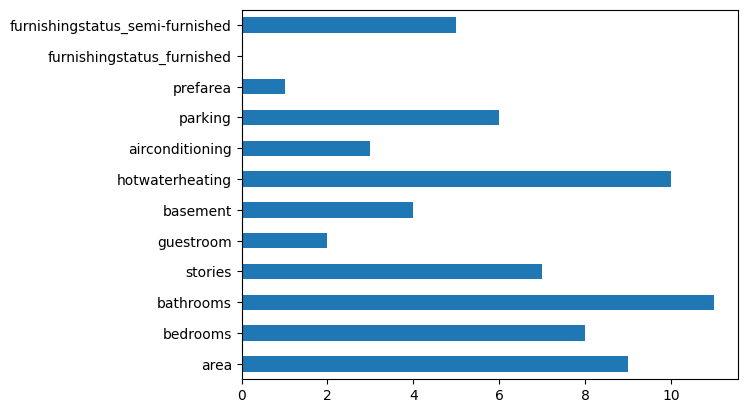

In [14]:
#Fisher
ranks = fisher_score.fisher_score(X.values, y.values)

feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')


In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
0,area,279446.07
8,parking,282.83
4,guestroom,248.50
6,hotwaterheating,224.40
9,prefarea,223.95
7,airconditioning,198.96
10,furnishingstatus_furnished,183.85
5,basement,171.89
11,furnishingstatus_semi-furnished,137.84
3,stories,128.58


In [16]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, random_state=101)

X_val, X_test, y_val, y_test=train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [17]:
print(f"Train data amount: {len(X_train)}")
print(f"Test data amount: {len(X_test)}")
print(f"Validation data amount: {len(X_val)}")

Train data amount: 381
Test data amount: 82
Validation data amount: 82


In [18]:
# as in Classic ML, it's often a good idea to follow this structure:
# Normalization/standardization -> Regularization -> Rest of the model
# this example does just that
# you can also try LayerNormalization instead of BatchNormalization
# and l2-regularizer instead of l1. depends on situation which work better
#model = keras.Sequential(
#    [
#        layers.BatchNormalization(input_shape=(9,)),
#        layers.Dense(4, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
#        layers.Dense(12, activation="relu"),
#        layers.Dropout(0.1),
#        layers.Dense(8, activation="relu"),
#        layers.Dense(1)
#    ]
#)

In [19]:
var_amount=len(X.columns)

# needed imports:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# create a model checkpoint to a file, and only save the best one
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', save_best_only=True)

# combine all active callbacks into a list
# have only those you need, for example only ModelCheckpoint
callback_list = [ mc]

# later, we need to attach the callbacks right when we start training
# model.fit(x=X_train, y=y_train, epochs=3000, validation_data=(X_val, y_val), callbacks=callback_list)

# IF USING MODELCHECKPOINT:

# we have to load the model after plotting the training history, and right before evaluation metrics:

# override the last model with the best model version from the history
# from keras.models import load_model
# model = load_model('best_model.keras')
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(var_amount,)),
        layers.Dense(24, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=0.1,l2=0.1)),
        layers.Dropout(0.2),
        layers.Dense(16, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1)
    ]
)


model.compile(optimizer='adam', loss='mse')


model.summary()

c:\Users\janni\OneDrive\Fächer - Uni\5.Semester\VS_DeepL_AdDA\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 12)             │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 881 (3.44 KB)

 Non-trainable params: 24 (96.00 B)

In [20]:
model.fit(x=X_train, y=y_train, epochs=800, validation_data=(X_val, y_val),callbacks=callback_list)

Epoch 1/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 25842883231744.0000 - val_loss: 25236877606912.0000
Epoch 2/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 25178278985728.0000 - val_loss: 25236873412608.0000
Epoch 3/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24390404145152.0000 - val_loss: 25236867121152.0000
Epoch 4/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23598070759424.0000 - val_loss: 25236860829696.0000
Epoch 5/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 25182762696704.0000 - val_loss: 25236852441088.0000
Epoch 6/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26173197254656.0000 - val_loss: 25236839858176.0000
Epoch 7/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26078571659264.0000 - val_loss: 25236820983808.0000
Epoch 8/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24234346676224.0000 - val_loss: 25236793720832.0000
Epoch 9/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25447073054720.0000 - val_loss: 25236755972096.000

<Axes: >

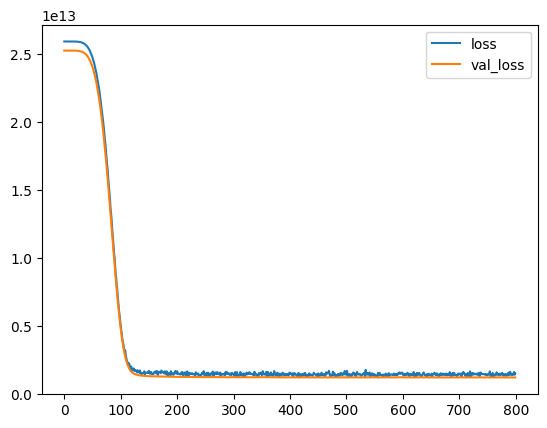

In [21]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [22]:
from keras.models import load_model
model = load_model('best_model_regression2.keras')

ValueError: File not found: filepath=best_model_regression2.keras. Please ensure the file is an accessible `.keras` zip file.

In [48]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
1754523762688.0

Train data evaluation:
1039155003392.0


In [50]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Test True Y,Model Predictions
0,4340000,4339588.00
1,4403000,4111337.25
2,4095000,3798822.00
3,8295000,6502436.00
4,7343000,6858161.50
5,3150000,5400091.00
6,8890000,6127311.00
7,3780000,4466423.50
8,4690000,4032625.25
9,6293000,6613077.00


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

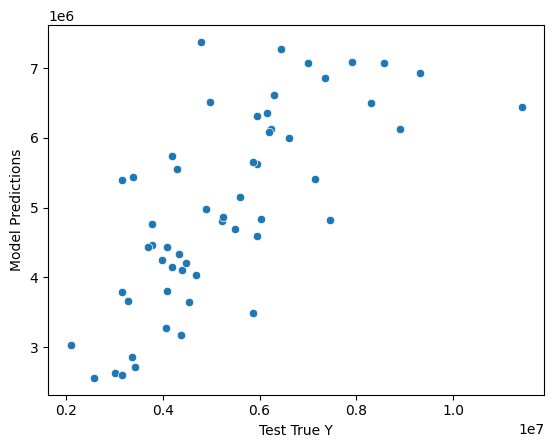

In [51]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [53]:

print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "Unit")

print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "Unit^2")

print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "Unit")


print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))


print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
947168.96 Unit

MSE
1754523789323.62 Unit^2

RMSE:
1324584.38 Unit

R-squared:
0.49

Explained variance score:
0.52


82

 Predictions 

82


C:\Users\janni\AppData\Local\Temp\ipykernel_1500\1872061308.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))
c:\Users\janni\OneDrive\Fächer - Uni\5.Semester\DeepL\Test\.venv\lib\site-packages\seaborn\distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\Users\janni\OneDrive\Fächer - Uni\5.Semester\DeepL\Test\.venv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\janni\OneDrive\Fächer - Uni\5.Semester\DeepL\Test\.venv\lib\site-packages\numpy\lib\histograms.py:885: Runtim

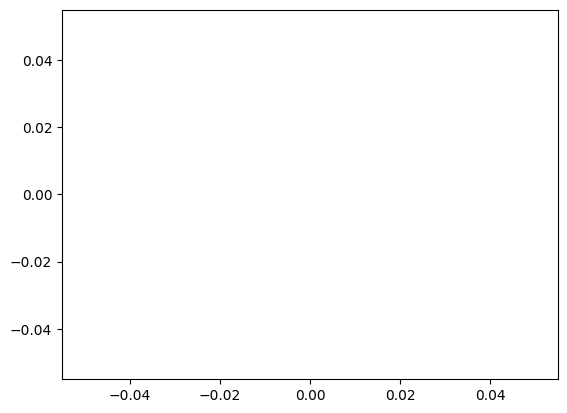

In [35]:
print(len(y_test))
print("\n Predictions \n")
print(len(test_predictions))
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

In [36]:
df.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0


In [37]:
tester_row = {
'area': 7420, 
'bedrooms':4, 
'bathrooms':2, 
'stories':3, 
'mainroad':1,
'guestroom':0,
'basement':0, 
'hotwaterheating':0, 
'airconditioning':1,
'parking':2, 
'prefarea':1, 
'furnishingstatus_furnished':1,
'furnishingstatus_semi-furnished':0
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [38]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated Price:")
print(f"{round(float(result), 2)}")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Estimated Price:
8102746.0
----------------


C:\Users\janni\AppData\Local\Temp\ipykernel_1500\2460745286.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"{round(float(result), 2)}")
